<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup
import requests
import pandas as pd

Download the webpage at the url


In [3]:
#your code goes here
data  = requests.get(url).text 

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,"html5lib")

Scrape the `Language name` and `annual average salary`.


In [19]:
#your code goes here
table = soup.find('table')
languages_salary_list = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    language = cols[1].getText()
    salary = cols[3].getText().replace("$","").replace(",","")
    languages_salary_list.append([language, salary])
languages_salary_list.remove(['Language', 'Average Annual Salary'])
languages_salary_list

[['Python', '114383'],
 ['Java', '101013'],
 ['R', '92037'],
 ['Javascript', '110981'],
 ['Swift', '130801'],
 ['C++', '113865'],
 ['C#', '88726'],
 ['PHP', '84727'],
 ['SQL', '84793'],
 ['Go', '94082']]

Save the scrapped data into a file named *popular-languages.csv*


In [21]:
# your code goes here
df_data = pd.DataFrame(languages_salary_list, columns=['Language', 'Average Annual Salary'])
df_data.to_csv('popular-languages.csv', index=False)
print("Done!")

Done!


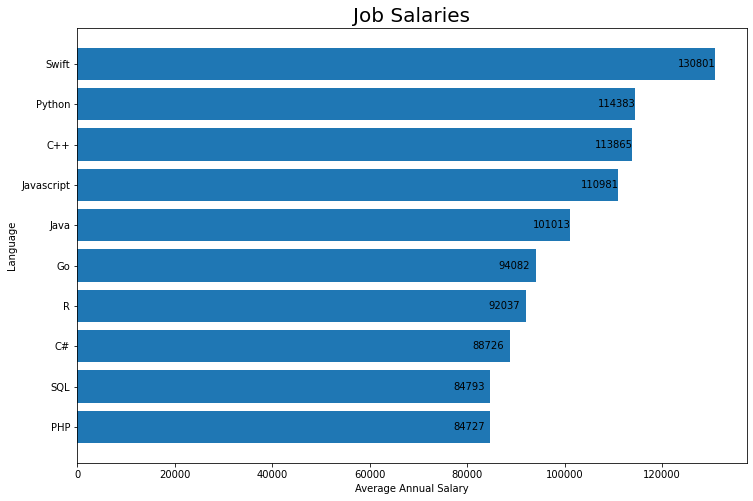

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_popular_languages = pd.read_csv('popular-languages.csv').sort_values('Average Annual Salary', ascending=[True])
fig, ax = plt.subplots(figsize=(12,8))
g=ax.barh(df_popular_languages['Language'], df_popular_languages['Average Annual Salary'])
plt.title('Job Salaries', size=20)
ax.set_ylabel("Language")
ax.set_xlabel("Average Annual Salary")
ax.bar_label(g, label_type="edge", padding=-37)
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01).
